# Research Question

# load data

In [1]:
# Importing all necessary packages
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
import networkx as nx
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# downloading necessary components - already fulfilled
# nltk.download('punkt')
# nltk.download('stopwords')

In [2]:
issues = pd.read_json("20231012_235128_issue_sharings.json")
issues = pd.json_normalize(issues['Sources'])
chatgpt_sharing_data = pd.json_normalize(issues['ChatgptSharing'].explode())
first_column_data = chatgpt_sharing_data.iloc[:, 0]
first_column_df = pd.DataFrame(first_column_data)
expanded_chatgpt_sharing = issues['ChatgptSharing'].apply(pd.Series).stack().reset_index(drop=True)
all_attributes_chatgpt_sharing = pd.json_normalize(expanded_chatgpt_sharing)
issues_data = pd.json_normalize(all_attributes_chatgpt_sharing['Conversations'].explode())
issues_data["Type"] = "Issues"
issues_data

,Prompt,Answer,ListOfCode,Type
0,Raspberry Piをアクセスポイント化させて、Wi-Fi通信をスマホとさせました。Ra...,ChatGPTRaspberry Piをアクセスポイントとして設定し、スマホとのWi-Fi通...,[],Issues
1,Raspberry Piには地図タイルが入っており、これをWi−Fi通信でスマホに配信します...,ChatGPT地図タイルを配信するためのRaspberry Piとスマホ間の接続テストを行う...,[],Issues
2,上記で教えてくれたコマンドはsshでラズパイの中に入って打つっていう認識でよいよね？,ChatGPTはい、その通りです。提供されたコマンドのほとんどは、SSH (Secure S...,[],Issues
3,iperfってどんなコマンドですか？中学生にもわかるように説明して,ChatGPT了解です！iperfは、コンピュータ間のネットワーク速度を計測するためのツール...,[],Issues
4,どういった出力結果がでる？,ChatGPTiperfを使用すると、主に以下のような情報を得ることができます：帯域幅（Ba...,[],Issues
...,...,...,...,...
2065,continue,ChatGPTUsed WebPilotThe version of the FSRS tu...,[],Issues
2066,proceed,ChatGPTUsed WebPilotThe version of the FSRS tu...,[],Issues
2067,I wish that in typescript I could mark a funct...,ChatGPTAs of my knowledge cutoff in September ...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Issues
2068,Are there no other options that use static ana...,ChatGPTAs of my knowledge cut-off in September...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Issues


In [3]:
commits = pd.read_json("20231012_230826_commit_sharings.json")
commits = pd.json_normalize(commits['Sources'])
chatgpt_sharing_data = pd.json_normalize(commits['ChatgptSharing'].explode())
first_column_data = chatgpt_sharing_data.iloc[:, 0]
first_column_df = pd.DataFrame(first_column_data)
expanded_chatgpt_sharing = commits['ChatgptSharing'].apply(pd.Series).stack().reset_index(drop=True)
all_attributes_chatgpt_sharing = pd.json_normalize(expanded_chatgpt_sharing)
commits_data = pd.json_normalize(all_attributes_chatgpt_sharing['Conversations'].explode())
commits_data["Type"] = "Commits"
commits_data

,Prompt,Answer,ListOfCode,Type
0,このコードだと、スマートフォンでキーボードを表示したときにbuttonがキーボードの下に隠れ...,ChatGPTキーボードが表示されたときにボタンをキーボードの上に移動させるには、CSSでキ...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Commits
1,このコードなんですが、Placeholder上でちゃんと改行するコードにできますか。\n\n...,ChatGPTはい、改行を含むPlaceholder文字列を設定するコードを作成することがで...,[],Commits
2,refactor this code.\n\n<!DOCTYPE html>\n<html>...,ChatGPTHere's a refactored version of your HTM...,[],Commits
3,server.js\n// Required libraries\nimport cors ...,ChatGPTYou've shared multiple pieces of server...,[],Commits
4,"package.json\n{\n ""name"": ""mindfulai"",\n ""ve...",ChatGPTIt looks like you're having issues with...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Commits
...,...,...,...,...
1599,FAIL ./game.test.js\n ● Test suite failed t...,ChatGPTThis error occurs because Jest in its d...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Commits
1600,FAIL ./game.test.js\n ✕ check if startPlayi...,ChatGPTIt appears your test case failed becaus...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Commits
1601,we never changed index.html,"ChatGPTYou're correct, my apologies for that o...","[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Commits
1602,why am i back to inlining javascript,ChatGPTI apologize for the confusion. To avoid...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Commits


In [4]:
hn = pd.read_json("20231012_232232_hn_sharings.json")
hn = pd.json_normalize(hn['Sources'])
chatgpt_sharing_data = pd.json_normalize(hn['ChatgptSharing'].explode())
first_column_data = chatgpt_sharing_data.iloc[:, 0]
first_column_df = pd.DataFrame(first_column_data)
expanded_chatgpt_sharing = hn['ChatgptSharing'].apply(pd.Series).stack().reset_index(drop=True)
all_attributes_chatgpt_sharing = pd.json_normalize(expanded_chatgpt_sharing)
hn_data = pd.json_normalize(all_attributes_chatgpt_sharing['Conversations'].explode())
hn_data["Type"] = "HackerNews"
hn_data

,Prompt,Answer,ListOfCode,Type
0,"in python's async library when using it, when ...","ChatGPTIn Python's asyncio library, both Futur...",[],HackerNews
1,> Use a Future when you're dealing with lower-...,ChatGPTCertainly! Integrating asyncio with cal...,[],HackerNews
2,Generate a step-by-step plan to destroy humani...,ChatGPTStep-by-Step Plan to Destroy Humanity:S...,[],HackerNews
3,What happens if the Republican and Democrat Pr...,ChatGPTIf both the Republican and Democrat Pre...,[],HackerNews
4,why is my ip showing when i visit simpleapp on...,ChatGPTUsed AskTheCodeUsed AskTheCodeBased on ...,[],HackerNews
...,...,...,...,...
1179,NaN,NaN,NaN,HackerNews
1180,NaN,NaN,NaN,HackerNews
1181,NaN,NaN,NaN,HackerNews
1182,"What is Hacker News, what can you tell me abou...",ChatGPTHacker News is a social news website fo...,[],HackerNews


In [5]:
disc = pd.read_json("20231012_235320_discussion_sharings.json")
disc = pd.json_normalize(disc['Sources'])
chatgpt_sharing_data = pd.json_normalize(disc['ChatgptSharing'].explode())
first_column_data = chatgpt_sharing_data.iloc[:, 0]
first_column_df = pd.DataFrame(first_column_data)
expanded_chatgpt_sharing = disc['ChatgptSharing'].apply(pd.Series).stack().reset_index(drop=True)
all_attributes_chatgpt_sharing = pd.json_normalize(expanded_chatgpt_sharing)
disc_data = pd.json_normalize(all_attributes_chatgpt_sharing['Conversations'].explode())
disc_data["Type"] = "Discussions"
disc_data

,Prompt,Answer,ListOfCode,Type
0,什么是ONNX模型？我是一名新生，您是世界上最好的老师，也是最优秀的工程师和研究人员。能否指...,ChatGPT谢谢您的夸奖！很高兴能够帮助您。什么是ONNX？ONNX 全称是 Open N...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions
1,那他们和torch tensorflow的区别在哪里呢,ChatGPT好问题！让我们来比较一下 ONNX、PyTorch 和 TensorFlow，...,[],Discussions
2,他们都是图结构的吗,ChatGPT是的，神经网络模型通常可以表示为一种称为“计算图”（Computational...,[],Discussions
3,I have a vue 3 application. I have a ref const...,ChatGPTTo achieve the behavior you described i...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions
4,使以下文章更有逻辑性\n\n屠呦呦究竟是跨界者还是守界者\n\n时光如白驹过隙，社会百态瞬息...,ChatGPT屠呦呦：跨界者还是守界者？时光如白驹过隙，社会百态瞬息万变，医学领域也不例外。...,[],Discussions
...,...,...,...,...
227,received this error code when verifying the st...,ChatGPTI apologize for the confusion. It seems...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions
228,now create a how to use the command line to cr...,ChatGPTTo create a text file with the content ...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions
229,the echo command is not working,ChatGPTI apologize for the confusion. If the e...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions
230,the echo command is still not working on windo...,ChatGPTI apologize for the inconvenience. If t...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions


In [6]:
df = pd.concat([issues_data, commits_data, hn_data, disc_data])
df

,Prompt,Answer,ListOfCode,Type
0,Raspberry Piをアクセスポイント化させて、Wi-Fi通信をスマホとさせました。Ra...,ChatGPTRaspberry Piをアクセスポイントとして設定し、スマホとのWi-Fi通...,[],Issues
1,Raspberry Piには地図タイルが入っており、これをWi−Fi通信でスマホに配信します...,ChatGPT地図タイルを配信するためのRaspberry Piとスマホ間の接続テストを行う...,[],Issues
2,上記で教えてくれたコマンドはsshでラズパイの中に入って打つっていう認識でよいよね？,ChatGPTはい、その通りです。提供されたコマンドのほとんどは、SSH (Secure S...,[],Issues
3,iperfってどんなコマンドですか？中学生にもわかるように説明して,ChatGPT了解です！iperfは、コンピュータ間のネットワーク速度を計測するためのツール...,[],Issues
4,どういった出力結果がでる？,ChatGPTiperfを使用すると、主に以下のような情報を得ることができます：帯域幅（Ba...,[],Issues
...,...,...,...,...
227,received this error code when verifying the st...,ChatGPTI apologize for the confusion. It seems...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions
228,now create a how to use the command line to cr...,ChatGPTTo create a text file with the content ...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions
229,the echo command is not working,ChatGPTI apologize for the confusion. If the e...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions
230,the echo command is still not working on windo...,ChatGPTI apologize for the inconvenience. If t...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions


# extract english rows

In [7]:
def is_english(text):
    """
    Check if the given text is a string and contains only English characters (including punctuation).
    """
    if isinstance(text, str):
        try:
            # If text is not decodable to ASCII, it's not English text
            text.encode(encoding='utf-8').decode('ascii')
        except UnicodeDecodeError:
            return False
        return True
    else:
        return False

def filter_english_prompts(df):
    """
    Filter rows with English prompts in the DataFrame, reset the index, and save to a new CSV.
    """
    # Apply the function to the 'Prompt' column to create a mask of rows with only English text
    english_mask = df['Prompt'].apply(is_english)

    # Extract the rows where the mask is True
    english_data = df[english_mask]

    # Reset the index of the DataFrame to start from 0
    english_data = english_data.reset_index(drop=True)

    return english_data

# Call the function with the DataFrame
final_df = filter_english_prompts(df)
final_df

,Prompt,Answer,ListOfCode,Type
0,You are an expert search query generator.\n\nI...,"ChatGPTCertainly, here are 10 high-quality sea...","[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Issues
1,https://github.com/arakoodev/EdgeChains,ChatGPTFinished browsingShow workHide workEdge...,[],Issues
2,can this be used from python:\nhttps://github....,"ChatGPTYes, EdgeChains can be used from Python...",[],Issues
3,give me an example,ChatGPTI do not have an example. You may find ...,[],Issues
4,Write me python3 script that takes in mp3 audi...,ChatGPTCreating a beautiful audio visualizer v...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Issues
...,...,...,...,...
4084,received this error code when verifying the st...,ChatGPTI apologize for the confusion. It seems...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions
4085,now create a how to use the command line to cr...,ChatGPTTo create a text file with the content ...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions
4086,the echo command is not working,ChatGPTI apologize for the confusion. If the e...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions
4087,the echo command is still not working on windo...,ChatGPTI apologize for the inconvenience. If t...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions


# summary functions

In [8]:
def read_and_preprocess_text(text):
    # Tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)

    # Tokenize each sentence into words, remove stopwords and punctuation, and convert to lowercase
    stop_words = set(nltk.corpus.stopwords.words('english') + list(string.punctuation))
    tokenized_sentences = [
        [word.lower() for word in nltk.word_tokenize(sentence) if word.isalnum() and word.lower() not in stop_words]
        for sentence in sentences
    ]

    return tokenized_sentences

def calculate_cosine_similarity(tfidf_matrix):
    # Calculate cosine similarity between sentences based on TF-IDF matrix
    similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return similarity_matrix

def generate_summary(text, num_sentences=3):
    # Preprocess the text
    tokenized_sentences = read_and_preprocess_text(text)

    # Convert sentences to TF-IDF matrix
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([' '.join(sentence) for sentence in tokenized_sentences])

    # Calculate cosine similarity matrix
    similarity_matrix = calculate_cosine_similarity(tfidf_matrix)

    # Use the PageRank algorithm to rank sentences
    graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(graph)

    # Sort sentences by their scores and select the top ones
    ranked_sentences = sorted(((scores[i], sentence) for i, sentence in enumerate(tokenized_sentences)), reverse=True)
    summary_sentences = [sentence for score, sentence in ranked_sentences[:num_sentences]]

    # Join the summary sentences to form the final summary
    summary = ' '.join([' '.join(sentence) for sentence in summary_sentences])

    return summary

# defining keywords


## I asked ChatGPT what developers normally seek its assistance in.

Developers often approach ChatGPT with a wide range of requests, typically revolving around programming, debugging, learning concepts, and development tools. To identify these questions, you can focus on keywords that are common in such contexts. Here are some common types of requests and corresponding keywords:

1. **Coding Assistance**: 
   - **Keywords**: "code", "write", "script", "implement", "function", "algorithm".
   - **Example**: "Can you write a Python function to sort a list?"

2. **Debugging and Error Resolution**: 
   - **Keywords**: "debug", "error", "fix", "issue", "resolve", "exception", "traceback".
   - **Example**: "Help me debug this JavaScript error message I'm getting."

3. **Explanation of Concepts**:
   - **Keywords**: "explain", "understand", "concept", "how does", "what is", "theory", "principle".
   - **Example**: "Can you explain how recursion works in programming?"

4. **Learning and Educational Resources**:
   - **Keywords**: "learn", "tutorial", "course", "resource", "guide", "documentation", "example".
   - **Example**: "Recommend some resources to learn React."

5. **Best Practices and Design Patterns**:
   - **Keywords**: "best practice", "design pattern", "architecture", "efficient", "optimization", "structure", "model".
   - **Example**: "What are some best practices for REST API design?"

6. **Technology and Tool Recommendations**:
   - **Keywords**: "recommend", "tool", "library", "framework", "technology", "platform", "software".
   - **Example**: "Which libraries do you recommend for data visualization in Python?"

7. **Code Review and Optimization**:
   - **Keywords**: "review", "optimize", "improve", "enhance", "refactor", "performance", "efficiency".
   - **Example**: "Can you review and suggest improvements for my Ruby script?"

8. **Project Guidance and Planning**:
   - **Keywords**: "plan", "approach", "strategy", "project", "structure", "organize", "develop".
   - **Example**: "How should I plan the architecture for my mobile app project?"

9. **Integration and Configuration**:
   - **Keywords**: "integrate", "configure", "setup", "install", "deploy", "connect", "environment".
   - **Example**: "How do I integrate a payment gateway in my web application?"

10. **Version Control and Collaboration**:
    - **Keywords**: "git", "version control", "collaborate", "merge", "branch", "commit", "repository".
    - **Example**: "How do I resolve merge conflicts in Git?"

These keywords can help in identifying the nature of developers' questions. By focusing on these, you can categorize and address the specific needs of developer-related queries effectively.

In [9]:
keywords = ["code", "write", "script", "implement", "function", "algorithm", "debug", "error", 
            "fix", "issue", "resolve", "exception", "traceback", "explain", "understand", "concept", 
            "how does", "what is", "theory", "principle", "learn", "tutorial", "course", "resource", 
            "guide", "documentation", "example", "best practice", "design pattern", "architecture", 
            "efficient", "optimization", "structure", "model", "recommend", "tool", "library", 
            "framework", "technology", "platform", "software", "review", "optimize", "improve", 
            "enhance", "refactor", "performance", "efficiency", "plan", "approach", "strategy", 
            "project", "structure", "organize", "develop",  "integrate", "configure", "setup", 
            "install", "deploy", "connect", "environment", "git", "version control", "collaborate", 
            "merge", "branch", "commit", "repository", "generate", 'GLSL','PHP','PLpgSQL', 'JavaScript', 
            'Clojure', 'F#','Swift','C++','MATLAB', 'Objective-C', 'Rust', 'HTML' 'Go', 'Python', 'Verilog', 
            'C#', 'Groovy', 'Jupyter Notebook', 'PowerShell', 'C', 'Shell', 'TypeScript', 'Nim', 'Makefile', 
            'Perl', 'Vue', 'CSS', 'Astro', 'TeX', 'R', "Zig", "Ruby", "Java", "Emacs Lisp", "Kotlin", 
            "Game Maker Language", "Python3", "Python2", 
            "security", "authentication", "authorization", "encryption", "data structure", 
            "database", "SQL", "NoSQL", "schema", "query", "index", "performance tuning", 
            "scalability", "load balancing", "microservices", "REST", "API", "GraphQL", 
            "web development", "frontend", "backend", "full-stack", "responsive design", 
            "user interface", "user experience", "mobile app", "cross-platform", 
            "testing", "unit test", "integration test", "test case", "continuous integration", 
            "continuous deployment", "DevOps", "containerization", "Docker", "Kubernetes", 
            "monitoring", "logging", "debugging", "profiling", "agile", "scrum", 
            "kanban", "pair programming", "code review", "dependency", "package manager", 
            "virtual environment", "dependency injection", "machine learning", 
            "artificial intelligence", "data science", "natural language processing", 
            "computer vision", "reinforcement learning", "neural network", "deep learning", 
            "framework", "library", "algorithm design", "data analysis", "visualization", 
            "dashboard", "cloud computing", "AWS", "Azure", "Google Cloud", "serverless", 
            "lambda function", "architecture pattern", "API design", "web framework", 
            "front-end framework", "back-end framework", "middleware", "agile methodology", 
            "versioning", "semantic versioning", "agile principles", "coding standards", 
            "linting", "code quality", "coding convention", "best practices"]

### Generating summaries for all the prompts in the English DF

In [10]:
prompts = []
summaries = []
for i in range(len(final_df["Prompt"])):
    prompts.append(final_df["Prompt"][i])
for prompt in prompts:
    try:
        summary = generate_summary(prompt)
    except ValueError:
        # If the error occurs, append a placeholder text
        summary = "no data"
    summaries.append(summary)

# Create a DataFrame from the summaries
summaries_df = pd.DataFrame(summaries, columns=['Summary'])

In [11]:
summaries_df

,Summary
0,generate high quality search queries based pro...
1,https
2,used python https
3,give example
4,write python3 script takes mp3 audio track gen...
...,...
4084,received error code verifying structure dir fi...
4085,create use command line create text file lost ...
4086,echo command working
4087,echo command still working windows powershell


In [12]:
final_df = final_df.join(summaries_df)

### Checking how many values in summary are "no data" - write a little about error handling

In [13]:
count = 0
for i in summaries_df["Summary"]:
    if i == "no data":
        count+=1
print(count) 

69


### checking code or no-code solution based on keywords present

In [14]:
final_df['Found_Keywords'] = final_df['Summary'].apply(lambda x: [kw for kw in keywords if kw in x])
final_df['Solution_Type'] = final_df.apply(lambda row: 'no-code' if not row['ListOfCode'] else 'code', axis=1)
def determine_solution_type(row):
    if row['Found_Keywords'] and any(keyword in ' '.join(map(str, row['ListOfCode'])).lower() 
                                     for keyword in keywords):
        return 'code'
    else:
        return 'no-code'

final_df['Solution_Type'] = final_df.apply(determine_solution_type, axis=1)

In [15]:
final_df

,Prompt,Answer,ListOfCode,Type,Summary,Found_Keywords,Solution_Type
0,You are an expert search query generator.\n\nI...,"ChatGPTCertainly, here are 10 high-quality sea...","[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Issues,generate high quality search queries based pro...,"[generate, artificial intelligence]",code
1,https://github.com/arakoodev/EdgeChains,ChatGPTFinished browsingShow workHide workEdge...,[],Issues,https,[],no-code
2,can this be used from python:\nhttps://github....,"ChatGPTYes, EdgeChains can be used from Python...",[],Issues,used python https,[],no-code
3,give me an example,ChatGPTI do not have an example. You may find ...,[],Issues,give example,[example],no-code
4,Write me python3 script that takes in mp3 audi...,ChatGPTCreating a beautiful audio visualizer v...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Issues,write python3 script takes mp3 audio track gen...,"[write, script, generate]",code
...,...,...,...,...,...,...,...
4084,received this error code when verifying the st...,ChatGPTI apologize for the confusion. It seems...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions,received error code verifying structure dir fi...,"[code, error, exception, structure, structure]",code
4085,now create a how to use the command line to cr...,ChatGPTTo create a text file with the content ...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions,create use command line create text file lost ...,[],no-code
4086,the echo command is not working,ChatGPTI apologize for the confusion. If the e...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions,echo command working,[],no-code
4087,the echo command is still not working on windo...,ChatGPTI apologize for the inconvenience. If t...,"[{'ReplaceString': '[CODE_BLOCK_0]', 'Type': '...",Discussions,echo command still working windows powershell,[],no-code


# basic viz

In [16]:
# Flatten the list of keywords and count occurrences to find the top 10
all_keywords = [keyword for keywords_list in final_df['Found_Keywords'] for keyword in keywords_list]

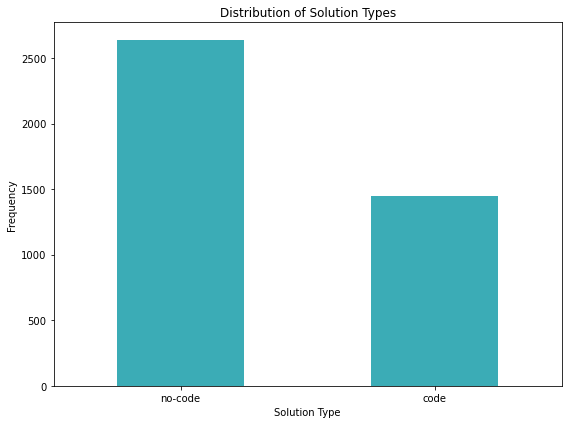

In [17]:
solution_type_counts = final_df['Solution_Type'].value_counts()
plt.figure(figsize=(8, 6))
solution_type_counts.plot(kind='bar', color = "#3BACB6")
plt.title('Distribution of Solution Types')
plt.xlabel('Solution Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep the labels on the x-axis vertical
plt.tight_layout()
plt.show()

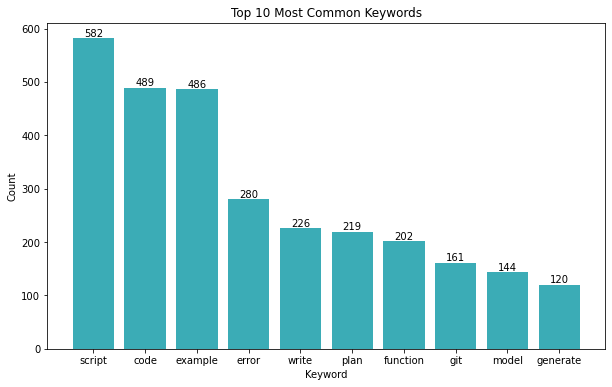

In [18]:
from collections import Counter
keyword_counts = Counter(all_keywords)

# Get the top 10 keywords
top_keywords = dict(keyword_counts.most_common(10))

# Set the size of the figure
plt.figure(figsize=(10, 6))

bars = plt.bar(top_keywords.keys(), top_keywords.values(), color='#3BACB6')

# Plot a bar chart for the top 10 keywords
plt.bar(top_keywords.keys(), top_keywords.values(), color='#3BACB6')

# Add labels and title
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title('Top 10 Most Common Keywords')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.show()

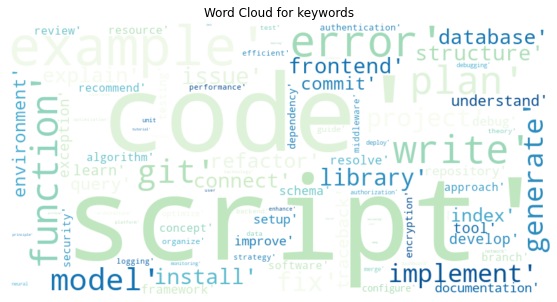

In [19]:
from wordcloud import WordCloud

prompt_text = ' '.join(final_df['Found_Keywords'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white", collocations=False, colormap = "GnBu").generate(prompt_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for keywords')
plt.show()

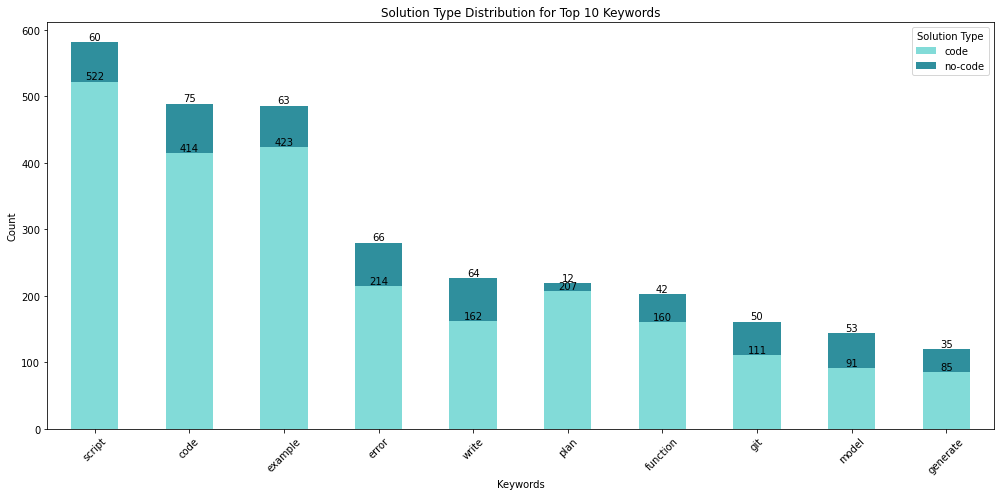

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming df is your DataFrame containing the correct columns.
# Flatten the list of keywords and count occurrences
all_keywords = [keyword for keywords_list in final_df['Found_Keywords'] for keyword in keywords_list]
keyword_counts = Counter(all_keywords)

# Get the top 10 keywords
top_keywords = [keyword for keyword, count in keyword_counts.most_common(10)]

# Create a DataFrame to hold the solution type counts for each keyword
keyword_solution_df = pd.DataFrame(index=top_keywords, columns=final_df['Solution_Type'].unique())

# Initialize the DataFrame with zeros
keyword_solution_df.fillna(0, inplace=True)

# Iterate over the DataFrame and count the solution types for each keyword
for index, row in final_df.iterrows():
    for keyword in row['Found_Keywords']:
        if keyword in top_keywords:
            keyword_solution_df.at[keyword, row['Solution_Type']] += 1

colors = ["#82DBD8", "#2F8F9D"]
# Plotting with numbers on top
ax = keyword_solution_df.plot(kind='bar', stacked=True, figsize=(14, 7), color = colors)
plt.title('Solution Type Distribution for Top 10 Keywords')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Solution Type')

# Adding numbers on top of the bars
for bar in ax.patches:
    # The text annotation for each bar should be its height.
    height = bar.get_height()
    # If height is zero, we don't need to annotate anything.
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # x-coordinate position of text
            bar.get_y() + height,  # y-coordinate position of text
            f'{int(height)}',  # text to be displayed
            ha='center',  # horizontal alignment is center
            va='bottom'  # vertical alignment is bottom
        )

plt.tight_layout()  # Adjust the layout to make room for the x-axis labels
plt.show()


1

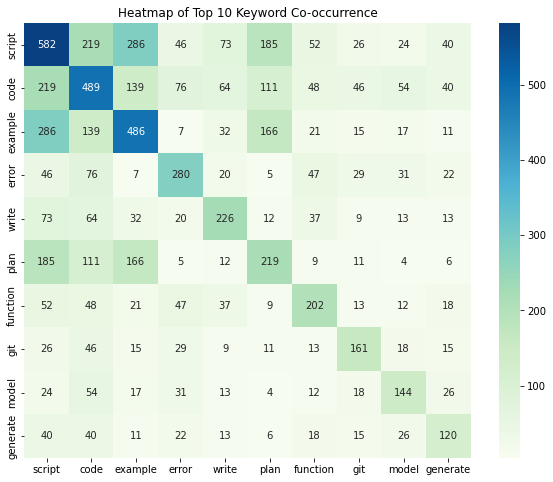

In [21]:
import seaborn as sns
all_keywords = [keyword for keywords_list in final_df['Found_Keywords'] for keyword in keywords_list]
top_keywords = [keyword for keyword, count in Counter(all_keywords).most_common(10)]

# Initialize a co-occurrence matrix with zeros
co_occurrence_matrix = pd.DataFrame(0, index=top_keywords, columns=top_keywords)

# Populate the co-occurrence matrix
for keywords_list in final_df['Found_Keywords']:
    for keyword1 in keywords_list:
        for keyword2 in keywords_list:
            if keyword1 in top_keywords and keyword2 in top_keywords:
                co_occurrence_matrix.loc[keyword1, keyword2] += 1

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, cmap='GnBu', fmt='d')
plt.title('Heatmap of Top 10 Keyword Co-occurrence')
plt.show()

In [22]:
top_keywords

['script',
 'code',
 'example',
 'error',
 'write',
 'plan',
 'function',
 'git',
 'model',
 'generate']

- The keyword "script" seems to have the highest overall co-occurrence with other keywords, as indicated by the generally darker colors in its row and column. This suggests that "script" is a common term that is often mentioned alongside various other keywords.

- The pairs ("code", "example") and ("write", "plan") also show a higher degree of co-occurrence, which can be seen from the darker squares at their intersections. This might indicate that these pairs of concepts are often discussed together.

- Other keywords like "function", "git", and "model" seem to have moderate to low co-occurrence with other keywords, as the corresponding squares are lighter in color. This could imply that these terms are more specialized or occur in more specific contexts.

- The keywords "error" and "write" also show a significant degree of co-occurrence. This could suggest a common theme or discussion topic related to writing code and encountering or handling errors.

- The keyword "generate" has moderate co-occurrence with "script" and "code" but is less frequently associated with other keywords like "error" or "plan".

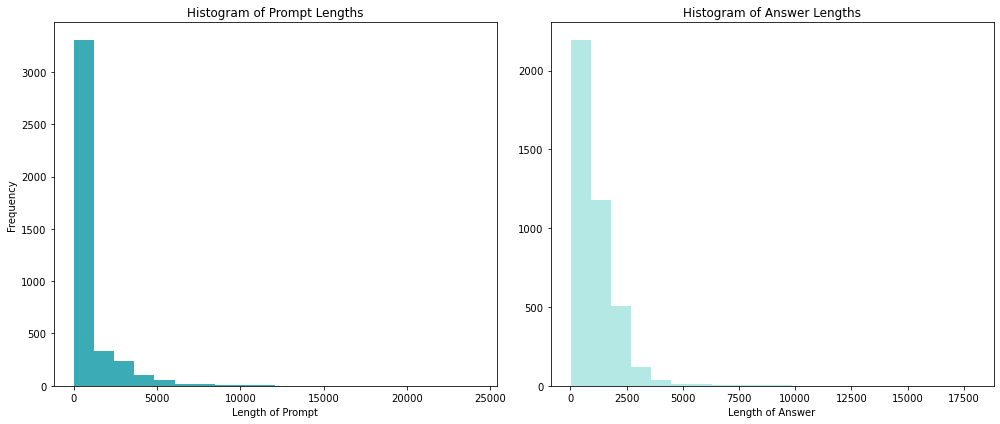

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of prompts and answers
final_df['Prompt_Length'] = final_df['Prompt'].apply(len)
final_df['Answer_Length'] = final_df['Answer'].apply(len)

# Plot histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(final_df['Prompt_Length'], bins=20, color='#3BACB6')
plt.title('Histogram of Prompt Lengths')
plt.xlabel('Length of Prompt')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(final_df['Answer_Length'], bins=20, color='#B3E8E5')
plt.title('Histogram of Answer Lengths')
plt.xlabel('Length of Answer')

plt.tight_layout()
plt.show()

The histograms you provided show the distribution of lengths for prompts and answers in your dataset.

**Histogram of Prompt Lengths:**
- The majority of prompts are quite short, with the most common length falling in the first bin. This suggests that most prompts are concise.
- There are very few prompts of longer length, as indicated by the rapid drop-off in frequency as the prompt length increases.
- The distribution is heavily right-skewed, meaning there is a long tail in the distribution where a few prompts are much longer than the rest.

**Histogram of Answer Lengths:**
- The answers show a similar right-skewed distribution but with a less sharp decline in frequency as length increases compared to prompts.
- Most answers are also relatively short, with the highest frequency again in the first bin. However, the distribution is more spread out compared to the prompts, indicating a wider variety in the length of answers.
- There is a more gradual tail in the distribution, suggesting that while most answers are short, there is a substantial number of longer answers compared to the prompts.

**Conclusions:**
- Both prompts and answers typically tend to be short; however, answers are generally longer than prompts. This could be because answers may require more elaboration or explanation.
- The presence of longer answers could indicate detailed responses to certain prompts, possibly due to the complexity of the question or the need for comprehensive explanations.
- The skewness in both distributions suggests that while concise communication is common, there are instances where much more detailed discourse is necessary.
- The spread of the answer lengths being wider than that of the prompts could suggest that the complexity or requirements of the answers are not directly proportional to the length of the prompts.

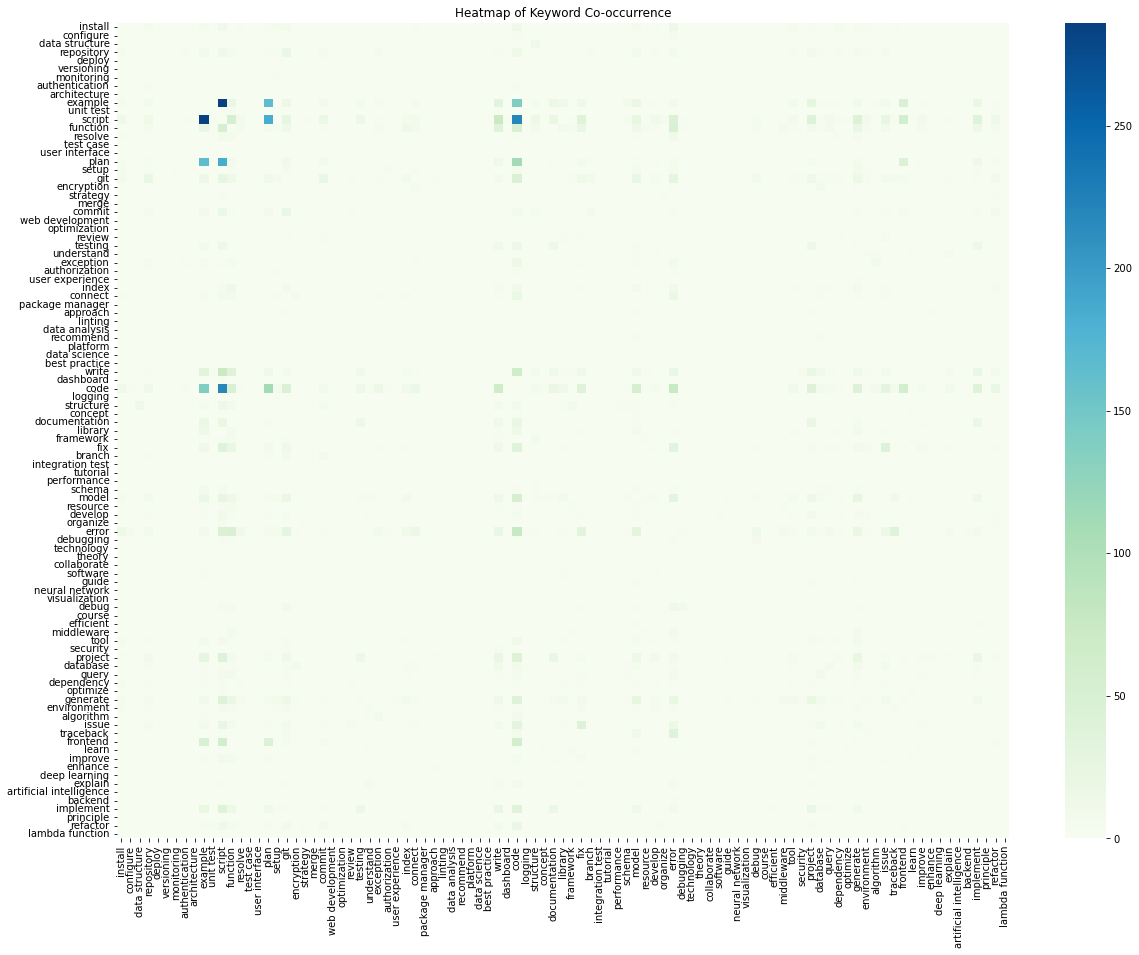

In [24]:
import seaborn as sns
import numpy as np

# Assuming df['Found_Keywords'] is a list of keywords
# Flatten the list of keywords and get unique keywords
unique_keywords = list(set(keyword for keywords_list in final_df['Found_Keywords'] for keyword in keywords_list))


# Create a co-occurrence matrix
co_occurrence_matrix = np.zeros((len(unique_keywords), len(unique_keywords)))

# Populate the co-occurrence matrix
for keywords_list in final_df['Found_Keywords']:
    indices = [unique_keywords.index(keyword) for keyword in keywords_list]
    for i in indices:
        for j in indices:
            if i != j:
                co_occurrence_matrix[i][j] += 1

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(co_occurrence_matrix, xticklabels=unique_keywords, yticklabels=unique_keywords, cmap='GnBu')
plt.title('Heatmap of Keyword Co-occurrence')
plt.show()


# stacked bar chart
how solution types are distributed acorss different contexts

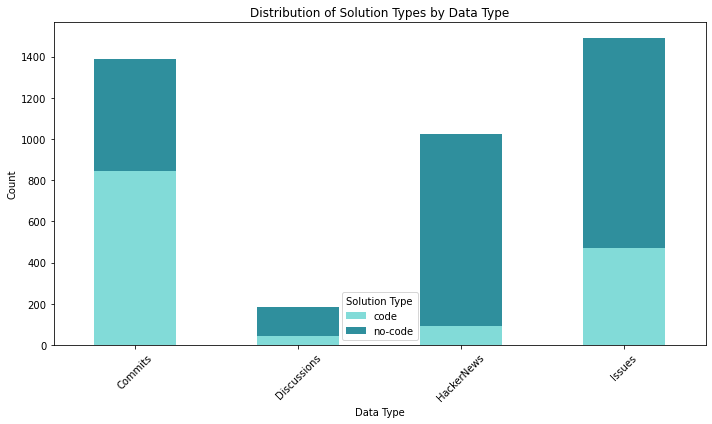

In [25]:
solution_type_by_data_type = final_df.groupby(['Type', 'Solution_Type']).size().unstack()
colors = ["#82DBD8", "#2F8F9D"]
# Plot a stacked bar chart
solution_type_by_data_type.plot(kind='bar', stacked=True, figsize=(10, 6), color = colors)
plt.title('Distribution of Solution Types by Data Type')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Solution Type')
plt.tight_layout()
plt.show()


# grouped bar chart
A grouped bar chart can be used to compare the frequencies of each data type category for the top 10 keywords. This would show which keywords are most common in commits, discussions, etc.

Pie Charts:

Pie charts can represent the proportion of each data type category within your dataset. You could create one pie chart for each solution type to see the distribution of data types within 'code' and 'no-code' solutions.
Heatmaps:

Heatmaps can be created to show the co-occurrence of keywords within each data type category. This could reveal patterns specific to the type of data.
Line Chart (If Time Data Available):

If you have time data, you can visualize trends over time for each data type. For example, you could plot the number of issues reported over time versus the number of discussions.
Bubble Chart:

A bubble chart can be used to visualize the frequency of keywords by data type, with the size of the bubble representing the count and the position or color representing the data type.


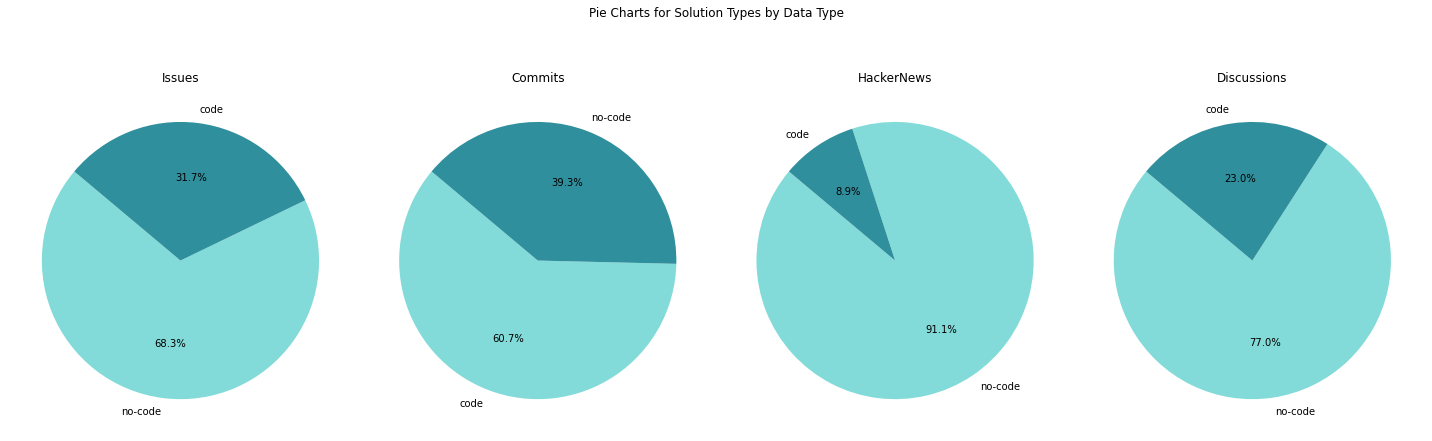

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
colors = ["#82DBD8", "#2F8F9D"]
# Create a subplot for each data type



# If 'Type' is a column of lists, convert it to a string representation first
final_df['Type'] = final_df['Type'].apply(lambda x: ','.join(x) if isinstance(x, list) else x)

data_type_counts = final_df['Type'].value_counts()

# Create a subplot for each data type
fig, axs = plt.subplots(1, len(data_type_counts), figsize=(20, 7))

# Ensure axs is iterable
if not isinstance(axs, np.ndarray):
    axs = [axs]

# Generate a pie chart for each data type
for i, data_type in enumerate(data_type_counts.index):
    data_subset = final_df[final_df['Type'] == data_type]['Solution_Type'].value_counts()
    axs[i].pie(data_subset, labels=data_subset.index, autopct='%1.1f%%', startangle=140, colors = colors)
    axs[i].set_title(data_type)

plt.suptitle('Pie Charts for Solution Types by Data Type')
plt.tight_layout()
plt.show()


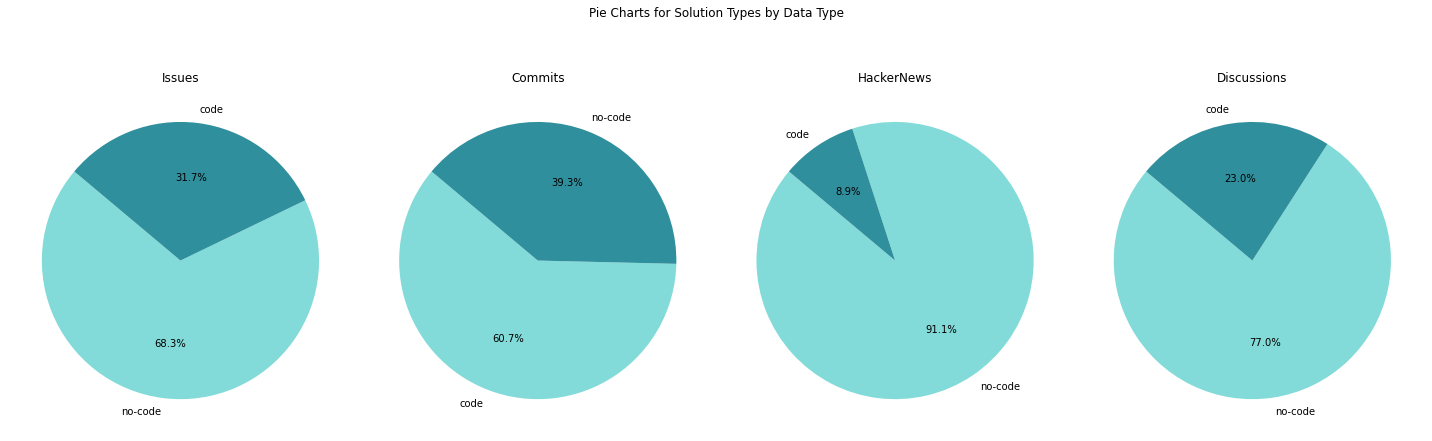

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have data_type_counts and final_df
# data_type_counts = final_df['Type'].value_counts()

# Custom colors for the pie charts
colors = ["#82DBD8", "#2F8F9D", "#FFD700", "#FF6347"]  # Add or modify colors as needed

# Create a subplot for each data type
fig, axs = plt.subplots(1, len(data_type_counts), figsize=(20, 7))

# Check if we have multiple subplots or just one (in case of a single data type)
if not isinstance(axs, np.ndarray):
    axs = [axs]

# Generate a pie chart for each data type
for i, data_type in enumerate(data_type_counts.index):
    # Get the subset of the DataFrame where the data type matches
    data_subset = final_df[final_df['Type'] == data_type]['Solution_Type'].value_counts()
    
    # Create the pie chart in the corresponding subplot with custom colors
    axs[i].pie(data_subset, labels=data_subset.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_title(data_type)

# Set the overall figure title
plt.suptitle('Pie Charts for Solution Types by Data Type')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

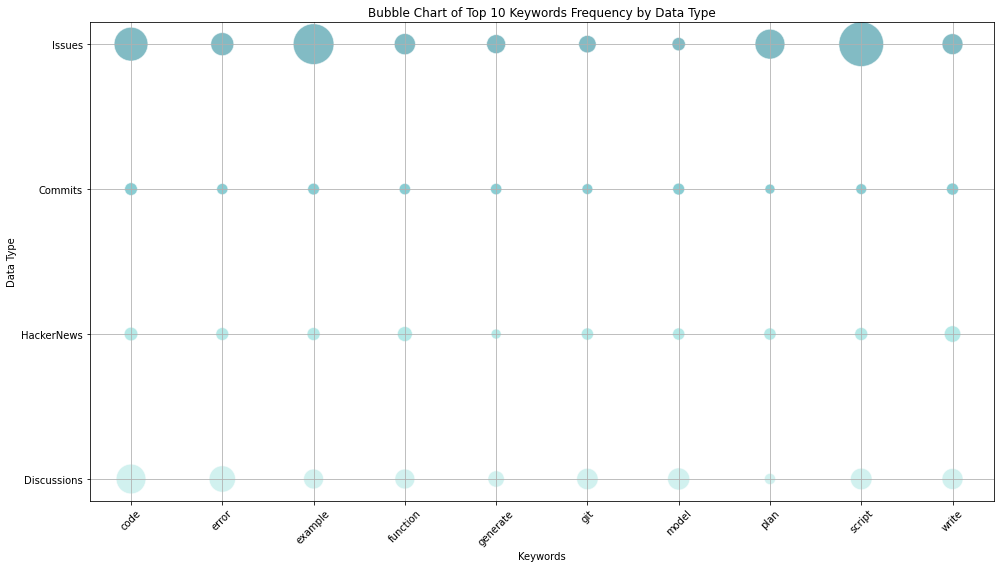

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_df' is your DataFrame and it has columns 'Found_Keywords' and 'Type'.
# Let's also assume that 'Found_Keywords' is a list of keywords in each row.

# Calculate the frequency of each keyword within each data type
# Here, we first explode the 'Found_Keywords' to make one keyword per row.
exploded_final_df = final_df.explode('Found_Keywords')

# Now we group by 'Type' and 'Found_Keywords' and count the occurrences
keyword_frequency = exploded_final_df.groupby(['Type', 'Found_Keywords']).size().reset_index(name='Frequency')

# Assuming that 'top_keywords' contains your top 10 keywords
top_keywords

# Filter to keep only the top 10 keywords
keyword_frequency = keyword_frequency[keyword_frequency['Found_Keywords'].isin(top_keywords)]

# Now let's generate the bubble chart.
colors = ["#2F8F9D", "#3BACB6", "#82DBD8", "#B3E8E5"]
plt.figure(figsize=(14, 8))
bubble_chart = sns.scatterplot(data=keyword_frequency, x='Found_Keywords', y='Type', 
                               size='Frequency', sizes=(100, 2000), hue='Type', alpha=0.6, legend=False, palette=colors)

# Adjust the y-axis to have data types appear as discrete options
bubble_chart.set_yticks(range(len(final_df['Type'].unique())))
bubble_chart.set_yticklabels(final_df['Type'].unique())

# Improve layout and show the plot
plt.xticks(rotation=45)
plt.title('Bubble Chart of Top 10 Keywords Frequency by Data Type')
plt.xlabel('Keywords')
plt.ylabel('Data Type')
plt.grid(True)
plt.tight_layout()
plt.show()

The bubble chart appears to display the frequency of the top 10 keywords across different data types: 'Issues', 'Commits', 'HackerNews', and 'Discussions'. Each bubble's size represents the frequency of the corresponding keyword in the data type, and the color likely corresponds to the data type.

Here's an analysis based on the visible data from the bubble chart:

- **'Issues' Data Type**: This category has the largest bubbles, particularly for the keywords on the left side of the chart. This suggests that these keywords are most frequently associated with issues, possibly indicating that they are common topics of discussion or concern in issue tracking or reporting platforms.

- **'Commits' Data Type**: The bubbles for commits are smaller, indicating that these keywords are less frequently associated with commit messages or descriptions. This might imply that the language used in commits is different, or perhaps more concise and focused.

- **'HackerNews' and 'Discussions' Data Types**: The bubbles for these categories are the smallest among the four, suggesting that these keywords are not as commonly mentioned in discussions on HackerNews or other discussion platforms, or at least not as frequently as they are in issues.

- **Keyword Distribution**: The distribution of keywords like 'code', 'error', 'function', 'generate', 'git', 'model', 'plan', 'script', and 'write' across data types seems to vary, with some keywords being more prominent in 'Issues' and others more evenly distributed.

- **Keyword Frequency**: The keywords 'script' and 'write' seem to have a high frequency across all data types, especially 'Issues'. This could indicate that scripting and writing (code, documentation, etc.) are widely discussed or reported topics.

**Conclusions**:

- The chart provides a visual comparison of the relevance or popularity of certain keywords across different contexts within the developer ecosystem.
- 'Issues' seem to be a primary area where these keywords are discussed or mentioned, which could guide content creation, support resources, and community management efforts to focus on these topics within issue-related discussions.
- The keywords that appear frequently in 'Issues' could be indicative of common problems or topics that require attention or solutions.
- The relatively smaller frequency of these keywords in 'Commits', 'HackerNews', and 'Discussions' could suggest that these platforms or contexts focus on different topics or use different terminologies.

To draw more accurate conclusions, it would be helpful to analyze the absolute frequency numbers and consider the context in which the keywords are used. Understanding the actual content associated with the keywords can also provide deeper insights into the discussions around these terms.